# Pytorch 🔥

Introduction to pytorch

This notebook is assembled from these sources:
- [practical-dl seminar](https://github.com/yandexdataschool/Practical_DL/blob/fall21/week02_autodiff/seminar_pytorch.ipynb)
- [hse dl-course homework](https://github.com/aosokin/dl_cshse_ami/blob/master/2021-fall/homeworks_small/shw2/DL21-fall-shw2.ipynb)
- [nyu dl course tensor tutorial](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/01-tensor_tutorial.ipynb)
- [nyu dl course autograd tutorial](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/03-autograd_tutorial.ipynb)
- [pytorch docs](https://pytorch.org/docs/stable/)

In [1]:
import torch
torch.__version__

'1.12.1+cu113'

### Jupyter lifehacks

In [2]:
# <Tab>
# torch.sq

In [3]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

In [4]:
# <Shift>+<Tab>
torch.nn.Module()

Module()

In [5]:
torch.nn.Module?

In [6]:
torch.nn.Module??

### Tensor class

In [7]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)

In [8]:
# Get the shape of the tensor
t.shape

torch.Size([2, 3, 4])

In [9]:
# Prints dimensional space and sub-dimensions
print(f'Point in a {t.numel()} dimensional space')
print(f'Prganised in {t.dim()} sub-dimensions')

Point in a 24 dimensional space
Prganised in 3 sub-dimensions


In [10]:
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x
t.random_(10)

tensor([[[4., 7., 5., 2.],
         [0., 1., 8., 9.],
         [5., 6., 5., 1.]],

        [[6., 2., 1., 7.],
         [0., 6., 4., 8.],
         [2., 5., 2., 6.]]])

In [11]:
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r.shape

torch.Size([3, 8])

In [12]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
# This *is* important, sigh...
s = r.clone()

In [14]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [15]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

### Vectors

In [16]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [17]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [18]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [19]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [20]:
# Extract sub-Tensor [from:to)
w[1:3]

tensor([0., 2.])

In [21]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 5)
v

tensor([1, 2, 3, 4])

In [22]:
# Square all elements in the tensor
print(v**2, v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


### Matrices

In [23]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [24]:
m.dim()

2

In [25]:
m.shape

torch.Size([2, 4])

In [26]:
# Sum along 0 axis
torch.sum(m, dim=0)

tensor([ 6.,  7.,  4., 16.])

In [27]:
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [28]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [29]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [30]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [31]:
# Indexing column 1, all rows (returns size 2x1)
m[:, [1]]

tensor([[5.],
        [2.]])

In [32]:
# Indexing columns 1 and 3, all rows (returns size 2x2)
m[:, [1, 3]]

tensor([[5., 7.],
        [2., 9.]])

In [33]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [34]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [35]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1.0, 5)
v

tensor([1., 2., 3., 4.])

In [36]:
# Scalar product
m @ v

tensor([49., 47.])

In [37]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [38]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.4850, 5.9993, 3.0592, 7.3437],
        [4.3653, 2.7450, 1.9542, 9.3611]])

In [39]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.2460, 4.9578, 2.8134, 6.1213],
        [3.1282, 1.8369, 0.5997, 8.7769]])

In [40]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[0.2179, 3.3248, 1.4271, 1.7810],
        [3.3840, 1.9556, 0.1887, 4.5345]])

In [41]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[  9.5032, 218.9591,   7.3879,  11.5300],
        [  8.7254,  18.8506,   1.3807,  17.6682]])

In [42]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [43]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [44]:
torch.Tensor(2, 3, 5).transpose(2, 0).shape

torch.Size([5, 3, 2])

### Constructors

In [45]:
x = torch.Tensor(2, 3, 4)
x.view(4, 6)
x.shape

torch.Size([2, 3, 4])

In [46]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [47]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

In [48]:
# Create a tensor filled with 0's
torch.zeros(3, 5, 8).shape

torch.Size([3, 5, 8])

In [49]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [50]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### Casting

In [51]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [52]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [53]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
m.to("cuda:0")

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], device='cuda:0')

In [54]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [55]:
import numpy as np

# Create a tensor of integers ranging from 0 to 4
n_np = np.arange(5)
n = torch.from_numpy(n_np)

n_np, n

(array([0, 1, 2, 3, 4]), tensor([0, 1, 2, 3, 4]))

In [56]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentiall n_np, not a clone, this affects n_np
n.mul_(2)
n_np, n

(array([0, 2, 4, 6, 8]), tensor([0, 2, 4, 6, 8]))

### Links

- *Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.
- Competition strong! https://github.com/google/jax

### Задание 1. Polar Pretzels (0.5 балла): _inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

Есть в тригонометрии класс функций с забавными графиками. Вот пример:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$

Реализуйте вычисление этой функции на PyTorch.

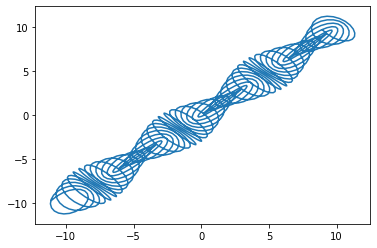

In [57]:
import matplotlib.pyplot as plt

t = torch.linspace(-10, 10, 1000)

# compute x(t) and y(t) as defined above

x = t - 1.5 * torch.cos(15 * t)
y = t - 1.5 * torch.sin(16 * t)

plt.plot(x.numpy(), y.numpy())

---
## Autograd

In [58]:
# Create a 2x2 tensor with gradient-accumulation capabilities
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
x

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

Do an operation on the tensor:

In [59]:
# Deduct 2 from all elements
y = x - 2
y

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)

``y`` was created as a result of an operation, so it has a ``grad_fn``.



In [60]:
# Do more operations on y
z = y * y * 3
a = z.mean()  # average

a

tensor(4.5000, grad_fn=<MeanBackward0>)

In [61]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=70525541e6ba22dbfed2117f95a90f1c196cbd3a9ad1b2cbc895fabbfed59b54
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [62]:
# Let's visualise the computational graph! (thks @szagoruyko)
from torchviz import make_dot

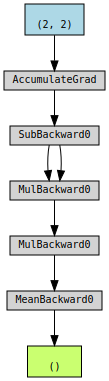

In [63]:
make_dot(a)

### Gradients

Let's backprop now `out.backward()` is equivalent to doing `out.backward(torch.tensor([1.0]))`

In [64]:
# Backprop
a.backward()

Print gradients $\frac{\text{d}a}{\text{d}x}$




In [65]:
# Compute it by hand BEFORE executing this
print(x.grad)

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])


You can do many crazy things with autograd!
> With Great *Flexibility* Comes Great Responsibility

In [66]:
# Dynamic graphs!
x = torch.randn(3, requires_grad=True, dtype=torch.float32)

y = x * 2
for i in range(10):
    y = y * 2

y

tensor([-2730.9685, -2358.8228, -1496.7749], grad_fn=<MulBackward0>)

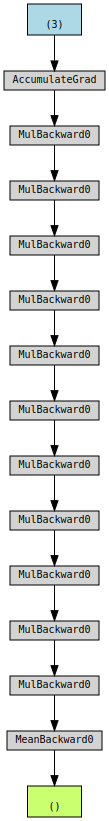

In [67]:
make_dot(y.mean())

### Inference

In [68]:
# This variable decides the tensor's range below
n = 3

In [69]:
# Both x and w that allows gradient accumulation
x = torch.arange(1., n + 1, requires_grad=True)
w = torch.ones(n, requires_grad=True)

# Non leaf node
h = w * x
# h.retain_grad()

z = h.sum()
z.backward()
print(x.grad, w.grad, h.grad, sep='\n')

tensor([1., 1., 1.])
tensor([1., 2., 3.])
None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [70]:
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)

# Regardless of what you do in this context, all torch tensors will not have gradient accumulation
with torch.no_grad():
    z = w @ x

try:
    z.backward()  # PyTorch will throw an error here, since z has no grad accum.
except RuntimeError as e:
    print('RuntimeError!!! >:[')
    print(e)

RuntimeError!!! >:[
element 0 of tensors does not require grad and does not have a grad_fn


### Links
- Good blog post on backprop: https://colah.github.io/posts/2015-08-Backprop/
- Documentation of the automatic differentiation package is at
http://pytorch.org/docs/autograd.

### Gradient descent

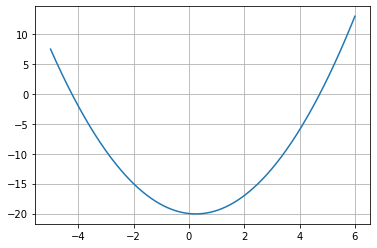

In [71]:
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 0.5*x - 20

dots = np.linspace(-5, 6, 1000)
plt.plot(dots, f(dots))
plt.grid()
plt.show()

### Let's find the minimum of this function using gradient descent

In [72]:
x = 10

lr = 0.001
for _ in range(10000):
    x -= lr * (2*x - 0.5)

assert abs(x - 0.25) < 1e-5, 'wtf, x=%s' % x

### Задание 2 (1 балл)
Найдите обе точки пересечения с осью $Ox$ функции $x^2 - 0.5x - 20$ с помощью градиентного спуска (можно запускать его 2 и более раз).

В найденных точках значение функции не должно превышать $10^{-5}$ по модулю (убедиться с помощью assert).

In [ ]:
#### YOUR CODE HERE

def f_d(x):
  return 2 * x - 0.5

def task2(x, lr=0.001):
    for _ in range(1000):
        x -= lr * f_d(x) * f(x)
    return x

x1, x2 = task2(-10), task2(10)

assert abs(f(x1)) < 1e-5, f'wtf: f(x1) = {f(x1)}'
assert abs(f(x2)) < 1e-5, f'wtf: f(x2) = {f(x2)}'

x1, x2

(-4.229118216792234, 4.7291182167922345)

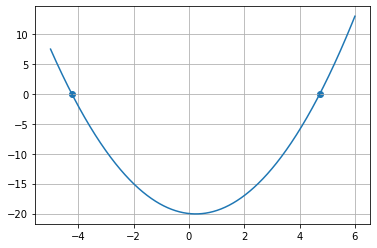

In [ ]:
plt.plot(dots, f(dots))
plt.scatter([x1, x2], [f(x1), f(x2)])
plt.grid()
plt.show()

## Linear regression

In [ ]:
from sklearn.datasets import load_boston
from IPython.display import clear_output

X, y = load_boston(return_X_y=True)
X = X[:, -1]

x = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

plt.scatter(x, y)
plt.show()

In [ ]:
# model tensors
w = torch.randn(3) * 1e-4
w.requires_grad=True
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

### Training loop

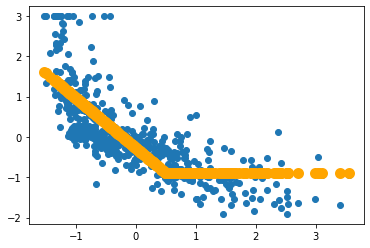

loss =  0.38727957010269165


In [ ]:
for i in range(1000):
    y_pred = w[2] * torch.nn.functional.relu(w[0] * x + b) + w[1]
    loss = torch.mean((y_pred - y)**2)
    
    # backprop
    loss.backward()

    # gradient descent step for weights
    w.data -= 0.03 * w.grad
    b.data -= 0.03 * b.grad
    
    # zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        # draw linear regression prediction vs data
        clear_output(True)
        plt.scatter(x.numpy(), y.numpy())
        plt.scatter(x.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.item())

---
## Higher level APIs

Above we've coded linear regression and basic gradient descent by hand. In practice it becomes cumbersome to manage parameters, their updates when you go beyond linear regression. Pytorch also has high-level api's with common nn building blocks, optimizers, distributed training utils and more. (see [docs](https://pytorch.org/docs/stable/) for examples)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # here you construct weights for layers
        self.fc1 = nn.Linear(1, 10)
        self.bn = nn.BatchNorm1d(10)
        self.fc2 = nn.Linear(10, 1)
    
    def forward(self, inp):
        # here you describe usage of layers
        x = self.fc1(inp)
        x = F.relu(x)
        x = self.bn(x)
        x = self.fc2(x)
        
        return x

In [ ]:
model = Network()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.9294],
         [-0.4505],
         [ 0.0995],
         [-0.1099],
         [ 0.3859],
         [ 0.4469],
         [-0.5348],
         [ 0.4958],
         [-0.9820],
         [ 0.1700]], requires_grad=True), Parameter containing:
 tensor([-0.7983,  0.0300,  0.1634, -0.8335,  0.6121,  0.3056,  0.2099,  0.8535,
         -0.3397, -0.4437], requires_grad=True), Parameter containing:
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True), Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True), Parameter containing:
 tensor([[-0.3033, -0.1131, -0.2396, -0.1764,  0.2618,  0.0215, -0.2745,  0.0180,
          -0.1344,  0.0723]], requires_grad=True), Parameter containing:
 tensor([0.1000], requires_grad=True)]

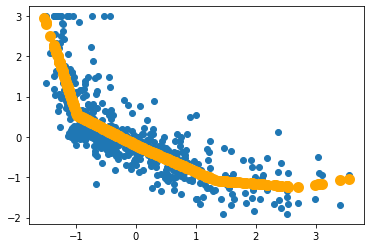

loss =  0.31021612882614136


In [ ]:
model = Network()
opt = torch.optim.SGD(model.parameters(), lr=0.03)
criterion = nn.MSELoss()

for i in range(1000):
    y_pred = model(x[:, None])[:, 0]
    loss = criterion(y, y_pred)

    # zero gradients
    opt.zero_grad()
    
    # backprop
    loss.backward()

    # gradient descent step for weights
    opt.step()
    
    
    # the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        # draw linear regression prediction vs data
        clear_output(True)
        plt.scatter(x.numpy(), y.numpy())
        plt.scatter(x.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.item())

In [ ]:
!wget --quiet --show-progress "https://raw.githubusercontent.com/aosokin/dl_cshse_ami/master/2021-fall/homeworks_small/shw2/util.py"

util.py             100%[===================>]   3.06K  --.-KB/s    in 0s      


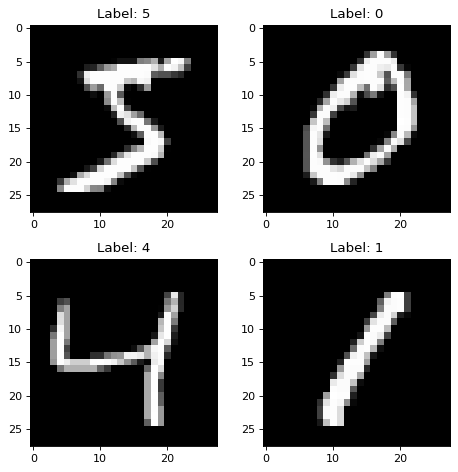

In [ ]:
# MNIST again
from util import load_mnist
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

fig = plt.figure(figsize=[6, 6], dpi=80)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % y_train[i])
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');
fig.tight_layout()

In [ ]:
class Net(nn.Module):
    def __init__(self, hidden_size=32):
        super().__init__()
        
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
device = "cuda:0"

train_ds = TensorDataset(
    torch.from_numpy(X_train.copy()).to(device),
    torch.from_numpy(y_train.copy()).to(device),
)

test_ds = TensorDataset(
    torch.from_numpy(X_val.copy()).to(device),
    torch.from_numpy(y_val.copy()).to(device),
)


In [ ]:
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True, drop_last=True)
test_dl  = DataLoader(test_ds, batch_size=256, shuffle=False)

In [ ]:
from statistics import mean


# Train function
def train(model, optimizer):
    loss_log, acc_log = [], []
        
    model.train()
    for x_batch, y_batch in train_dl:
        optimizer.zero_grad()
        output = model(x_batch)
        loss = F.cross_entropy(output, y_batch)
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()

        pred = torch.max(output, 1).indices
        acc = (pred == y_batch).sum() / y_batch.shape[0]
        acc_log.append(acc.item())

        loss = loss.item()
        loss_log.append(loss)
    return loss_log, acc_log


# Validation function
@torch.inference_mode()
def test(model):
    loss_log, acc_log = [], []
    model.eval()

    for x_batch, y_batch in test_dl:
        output = model(x_batch)
        loss = F.cross_entropy(output, y_batch)

        # compute gradients
        loss = loss.item()
        loss_log.append(loss)

        pred = torch.max(output, 1).indices
        acc = (pred == y_batch).sum() / y_batch.shape[0]
        acc_log.append(acc.item())

    return mean(loss_log), mean(acc_log)


def plot_history(train_history, val_history, title='loss'):
    plt.figure()

    plt.title('{} at {} epoch'.format(title, epoch))
    plt.plot(train_history, label='train', zorder=1)
    
    points = torch.tensor(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

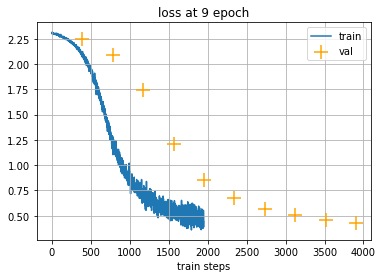

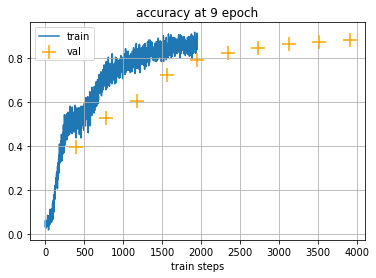

val_acc: 0.88056640625

CPU times: user 10.7 s, sys: 208 ms, total: 10.9 s
Wall time: 10.9 s


In [ ]:
%%time

train_log, train_acc_log = [],[]
val_log, val_acc_log = [],[]

model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
steps = len(train_ds) / 128

for epoch in range(10):
    train_loss, train_acc = train(model, opt)
    val_loss, val_acc = test(model)
    
    # store metrics
    train_log.extend(train_loss)
    train_acc_log.extend(train_acc)
    
    val_log.append((steps * (epoch + 1), val_loss))
    val_acc_log.append((steps * (epoch + 1), val_acc))
    
    # plot all metrics (loss and acc for train/val)
    clear_output()
    plot_history(train_log, val_log)    
    plot_history(train_acc_log, val_acc_log, title='accuracy')   
    
    print('val_acc:', val_acc, end='\n\n')

In [ ]:
_, val_acc = test(model)

print('Точность на тестовых данных:', val_acc)

Точность на тестовых данных: 0.88056640625


### Задание 3 (2.5 балла)

Реализуйте и обучите свою нейронную сеть (как минимум с четырьмя слоями) для данной задачи.
Достичь нужно минимум 95% точности.

In [ ]:
### YOUR CODE
class Task3Net(nn.Module):
    def __init__(self, hidden_size=64):
        super().__init__()
        
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [ ]:
%%time

train_log, train_acc_log = [],[]
val_log, val_acc_log = [],[]

task3_model = Task3Net().to(device)
opt = torch.optim.SGD(task3_model.parameters(), lr=0.005, momentum=0.95)
steps = len(train_ds) / 128

for epoch in range(25):
    train_loss, train_acc = train(task3_model, opt)
    val_loss, val_acc = test(task3_model)
    
    # store metrics
    train_log.extend(train_loss)
    train_acc_log.extend(train_acc)
    
    val_log.append((steps * (epoch + 1), val_loss))
    val_acc_log.append((steps * (epoch + 1), val_acc))
    
    # plot all metrics (loss and acc for train/val)
    clear_output()
    # plot_history(train_log, val_log)    
    # plot_history(train_acc_log, val_acc_log, title='accuracy')   
    
    print('epoch: ', epoch, ', val_acc:', val_acc, end='\n\n')

epoch:  24 , val_acc: 0.97138671875

CPU times: user 19.2 s, sys: 441 ms, total: 19.6 s
Wall time: 19.6 s


In [ ]:
_, val_acc = test(task3_model)

print('Точность на тестовых данных:', val_acc)

Точность на тестовых данных: 0.97138671875


### More:

- https://pytorch.org/tutorials/
- https://pytorch.org/ecosystem/
- Pytorch examples - a repo that implements many cool DL models in pytorch - https://github.com/pytorch
- More on new pytorch data-loading - https://github.com/pytorch/data